## Functional API Implementation
## Ch 7. Deep Learning w/ Python
### Gamze Keçibaş
---
### CONTENT
- **Step 01.** Import libraries  
- **Step 02.** Define dataset
- **Step 03.** Build the model
    - **Step 03.1.** Multilayer Perceptron (MLP)
    - **Step 03.2.** Convolutional Neural Network (CNN)
    - **Step 03.3.** Recurrent Neural Network (RNN)
    - **Step 03.4.** Shared Layers Model (SLM)
- **Step 04.** Train the model

**Step 01.** Import libraries

In [17]:
# Step 01. Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 02.** Define dataset

In [21]:
# for MLP
max_features= 10000
max_len= 500

(x_train, y_train), (x_test, y_test)= keras.datasets.imdb.load_data(num_words= max_features)
print("Train sequences:", len(x_train))
print("Test sequences:", len(x_test))
print("\nPad sequences (samples x time)")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen= max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen= max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

#for CNN
(x_train_CNN, y_train_CNN), (x_test_CNN, y_test_CNN) = keras.datasets.mnist.load_data()
assert x_train_CNN.shape == (60000, 28, 28)
assert x_test_CNN.shape == (10000, 28, 28)
assert y_train_CNN.shape == (60000,)
assert y_test_CNN.shape == (10000,)

Train sequences: 25000
Test sequences: 25000

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


**Step 03. Build the model**  
><code>input= layers.Input(shape=(2,))  
> hidden= Dense(2)(input)  
> model= Model(inputs= input, outputs= hidden) <code> 
    
* **Step 03.1** Multilayer Perceptron 

In [14]:
input_MP= tf.keras.layers.Input(shape=(500,))

hidden_MP1= tf.keras.layers.Dense(10, activation= 'relu')(input_MP)
hidden_MP2= tf.keras.layers.Dense(20, activation= 'relu')(hidden_MP1)
hidden_MP3= tf.keras.layers.Dense(10, activation= 'relu')(hidden_MP2)

output_MP= tf.keras.layers.Dense(1, activation='sigmoid')(hidden_MP3)

model_MP= tf.keras.models.Model(inputs= input_MP, outputs= output_MP)
print(model_MP.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_15 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
None


## MLP
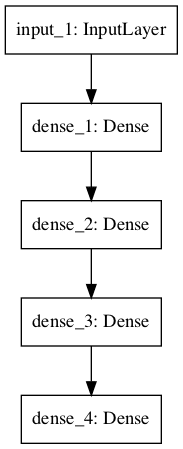

* **Step 03.2** Convolutional  Neural Network

In [22]:
input_CNN= tf.keras.layers.Input(shape=(28,28,1))

conv1= tf.keras.layers.Conv2D(32, kernel_size= 4, activation= 'relu')(input_CNN)
pool1= tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2= tf.keras.layers.Conv2D(16, kernel_size= 4, activation='relu')(pool1)
pool2= tf.keras.layers.MaxPooling2D(pool_size= (2,2))(conv2)
flat= tf.keras.layers.Flatten()(pool2)
hidden_CNN= tf.keras.layers.Dense(10, activation= 'relu')(flat)

output_CNN= tf.keras.layers.Dense(1, activation= 'sigmoid')(hidden_CNN)

model_CNN= tf.keras.models.Model(inputs= input_CNN, outputs= output_CNN)
print(model_CNN.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 16)          8208      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570

## CNN
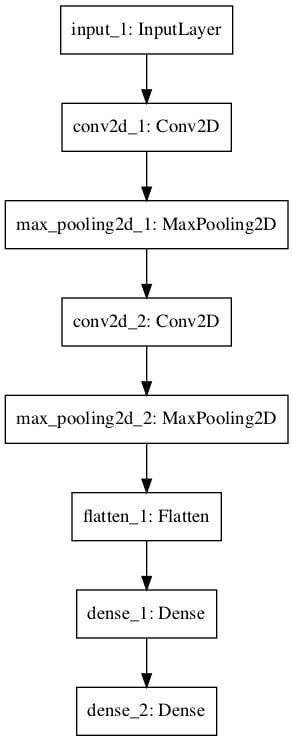

* **Step 03.3** Recurrent Neural Network

In [9]:
input_RNN= tf.keras.layers.Input(shape=(100,1))

hidden_RNN1= tf.keras.layers.LSTM(10)(input_RNN)
hidden_RNN2= tf.keras.layers.Dense(10, activation= 'relu')(hidden_RNN1)

output_RNN= tf.keras.layers.Dense(1, activation= 'sigmoid')(hidden_RNN2)

model_RNN= tf.keras.models.Model(inputs= input_RNN, outputs= output_RNN)

print(model_RNN.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


## RNN > LSTM
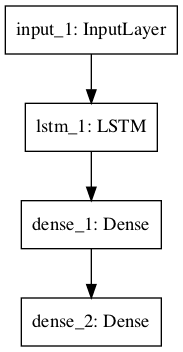

**Step 04.** Train the model

Epoch 1/10
157/157 [==============================] - 1s 2ms/step - loss: 0.6900 - acc: 0.5058 - val_loss: 0.7083 - val_acc: 0.4972
Epoch 2/10
157/157 [==============================] - 0s 1ms/step - loss: 0.6901 - acc: 0.5059 - val_loss: 0.7088 - val_acc: 0.4978
Epoch 3/10
157/157 [==============================] - 0s 1ms/step - loss: 0.6893 - acc: 0.5062 - val_loss: 0.7103 - val_acc: 0.4978
Epoch 4/10
157/157 [==============================] - 0s 1ms/step - loss: 0.6893 - acc: 0.5064 - val_loss: 0.7120 - val_acc: 0.4978
Epoch 5/10
157/157 [==============================] - 0s 1ms/step - loss: 0.6887 - acc: 0.5064 - val_loss: 0.7125 - val_acc: 0.4980
Epoch 6/10
157/157 [==============================] - 0s 1ms/step - loss: 0.6885 - acc: 0.5070 - val_loss: 0.7150 - val_acc: 0.4976
Epoch 7/10
157/157 [==============================] - 0s 1ms/step - loss: 0.6880 - acc: 0.5072 - val_loss: 0.7144 - val_acc: 0.4974
Epoch 8/10
157/157 [==============================] - 0s 1ms/step - loss: 0.

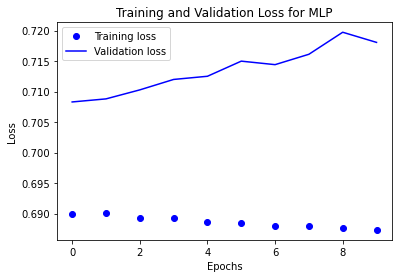

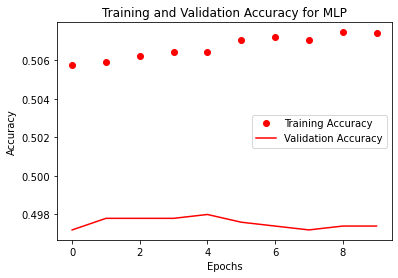

In [19]:
model_MP.compile(optimizer= keras.optimizers.RMSprop(learning_rate= 1e-4), 
              loss= keras.losses.binary_crossentropy,
              metrics= ['acc'])
history_MP= model_MP.fit(x_train, y_train,
                  epochs=10,
                  batch_size= 128,
                  validation_split= 0.2)

loss_MP = history_MP.history["loss"]
val_loss_MP = history_MP.history["val_loss"]
acc_MP = history_MP.history["acc"]
val_acc_MP = history_MP.history["val_acc"]

plt.figure()
plt.plot(range(10), loss_MP, "bo", label="Training loss")
plt.plot(range(10), val_loss_MP, "b", label="Validation loss")
plt.title("Training and Validation Loss for MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(range(10), acc_MP, "ro", label="Training Accuracy")
plt.plot(range(10), val_acc_MP, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy for MLP")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [43]:
model_CNN.compile(optimizer= keras.optimizers.RMSprop(), 
              loss= keras.losses.binary_crossentropy,
              metrics= ['acc'])
history_CNN= model_CNN.fit(x_train_CNN, y_train_CNN,
                  epochs=50,
                  batch_size= 128,
                  validation_split= 0.2)

loss_CNN = history_CNN.history["loss"]
val_loss_CNN = history_CNN.history["val_loss"]
acc_CNN = history_CNN.history["acc"]
val_acc_CNN = history_CNN.history["val_acc"]

plt.figure()
plt.plot(range(50), loss_CNN, "bo", label="Training loss")
plt.plot(range(50), val_loss_CNN, "b", label="Validation loss")
plt.title("Training and Validation Loss for CNN")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(range(50), acc_CNN, "ro", label="Training Accuracy")
plt.plot(range(50), val_acc_CNN, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy for CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/50
225/375 [=================>............] - ETA: 5s - loss: -24391489536.0000 - acc: 0.1135

KeyboardInterrupt: 